## Machine Learning: Predicting Country's Happiness Score using Survey Data

In [29]:
import pandas as pd
df = pd.read_excel('WHR20_DataForTable2.1.xls')
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.isnull().sum() 
#df['Log GDP per capita'].isnull().values.any()
#df[df.isna().any(axis=1)]

Country name                                                                0
year                                                                        0
Life Ladder                                                                 0
Log GDP per capita                                                         29
Social support                                                             13
Healthy life expectancy at birth                                           52
Freedom to make life choices                                               31
Generosity                                                                 83
Perceptions of corruption                                                 103
Positive affect                                                            21
Negative affect                                                            15
Confidence in national government                                         191
Democratic Quality                                              

remove variables with over 1000 missing values

In [32]:
df.drop(df.columns.tolist()[20:27], axis=1, inplace=True)


In [35]:
#df.drop(df['GINI index (World Bank estimate)'], axis=1, inplace=True)
df.isnull().sum() 

Country name                                                                0
year                                                                        0
Life Ladder                                                                 0
Log GDP per capita                                                         29
Social support                                                             13
Healthy life expectancy at birth                                           52
Freedom to make life choices                                               31
Generosity                                                                 83
Perceptions of corruption                                                 103
Positive affect                                                            21
Negative affect                                                            15
Confidence in national government                                         191
Democratic Quality                                              

In [39]:
df.drop(['Most people can be trusted, Gallup','GINI index (World Bank estimate)'], axis=1, inplace=True)


In [40]:
df.isnull().sum()

Country name                                                               0
year                                                                       0
Life Ladder                                                                0
Log GDP per capita                                                        29
Social support                                                            13
Healthy life expectancy at birth                                          52
Freedom to make life choices                                              31
Generosity                                                                83
Perceptions of corruption                                                103
Positive affect                                                           21
Negative affect                                                           15
Confidence in national government                                        191
Democratic Quality                                                       149

In [41]:
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,0.441906
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,0.327318
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,0.336764
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,0.344540


In [42]:
df[df['Log GDP per capita'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year"
413,Cyprus,2018,6.276443,NaN,0.825573,73.699997,0.794215,NaN,0.848337,0.750122,0.298021,0.352440,0.790700,0.832914,2.128885,0.339187,0.326167,0.448661
414,Cyprus,2019,6.136833,NaN,0.776078,73.900002,0.740058,NaN,0.865294,0.762677,0.290225,0.327288,NaN,NaN,2.109859,0.343803,0.326167,0.390295
672,Hong Kong S.A.R. of China,2019,5.659317,NaN,0.855826,NaN,0.726852,NaN,0.431974,0.599320,0.357607,0.332540,NaN,NaN,1.802768,0.318549,NaN,0.430317
865,Kosovo,2019,6.425144,NaN,0.842511,NaN,0.841190,NaN,0.920297,0.748522,0.140792,0.308195,NaN,NaN,2.504656,0.389821,0.290167,0.424230
944,Libya,2019,5.330222,NaN,0.826719,62.299999,0.761964,NaN,0.686413,0.708741,0.400737,NaN,NaN,NaN,2.564754,0.481172,NaN,0.529626
1041,Malta,2019,6.732977,NaN,0.921579,72.199997,0.923967,NaN,0.689411,0.706596,0.356244,0.704373,NaN,NaN,1.806136,0.268252,0.291100,0.398402
1223,North Cyprus,2012,5.463305,NaN,0.871150,NaN,0.692568,NaN,0.854730,0.709236,0.405435,0.414000,NaN,NaN,2.743689,0.502203,NaN,0.368299
1224,North Cyprus,2013,5.566803,NaN,0.869274,NaN,0.775383,NaN,0.715356,0.621554,0.442972,0.401788,NaN,NaN,2.460854,0.442059,NaN,0.360474
1225,North Cyprus,2014,5.785979,NaN,0.801802,NaN,0.829677,NaN,0.692221,0.723842,0.311336,0.412390,NaN,NaN,2.341181,0.404630,NaN,0.354395
1226,North Cyprus,2015,5.842550,NaN,0.791383,NaN,0.785353,NaN,0.659180,0.701609,0.318930,0.439621,NaN,NaN,2.222848,0.380459,NaN,0.415842


Impute missing data with average value of the column

In [45]:
pd.set_option('display.max_rows', 2000)
df = df.fillna(df.mean())
df.isnull().sum()

Country name                                                             0
year                                                                     0
Life Ladder                                                              0
Log GDP per capita                                                       0
Social support                                                           0
Healthy life expectancy at birth                                         0
Freedom to make life choices                                             0
Generosity                                                               0
Perceptions of corruption                                                0
Positive affect                                                          0
Negative affect                                                          0
Confidence in national government                                        0
Democratic Quality                                                       0
Delivery Quality         

C:\Users\shera\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1270: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


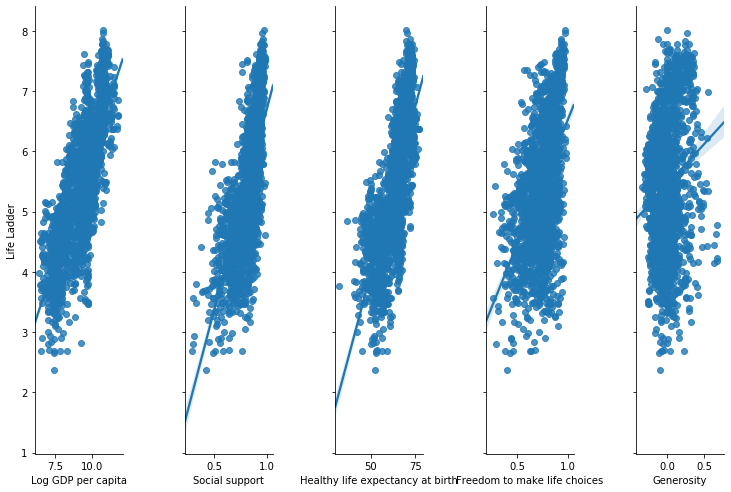

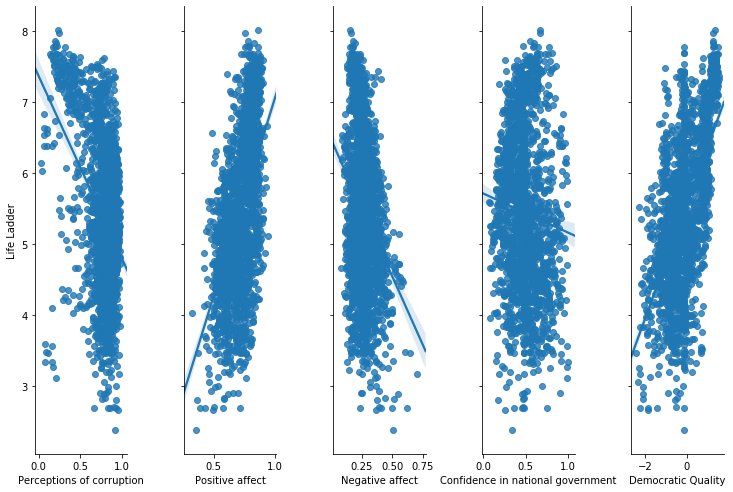

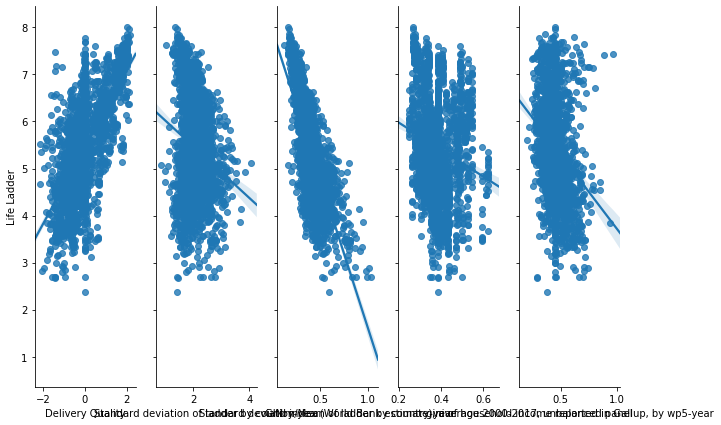

In [71]:
import seaborn as sns
#import matplotlib.pyplot as plt
#fig, axs = plt.subplots(nrows = 3,ncols=5,figsize=(16,16))
sns.pairplot(df, x_vars=df.columns.tolist()[4:9], y_vars='Life Ladder', size=7, aspect=0.3, kind='reg')
sns.pairplot(df, x_vars=df.columns.tolist()[9:14], y_vars='Life Ladder', size=7, aspect=0.3, kind='reg')
sns.pairplot(df, x_vars=df.columns.tolist()[14:19], y_vars='Life Ladder', size=7, aspect=0.3, kind='reg')



In [75]:
df.columns.tolist()[4:]

['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'Standard deviation of ladder by country-year',
 'Standard deviation/Mean of ladder by country-year',
 'GINI index (World Bank estimate), average 2000-2017, unbalanced panel',
 'gini of household income reported in Gallup, by wp5-year']

In [79]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = df.columns.tolist()[4:]
X = df[feature_cols]
y = df['Life Ladder']

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# variables' coefficients 
list(zip(feature_cols, lm1.coef_))

[('Log GDP per capita', 0.119542180114024),
 ('Social support', 0.3346162302445163),
 ('Healthy life expectancy at birth', 0.0034600615676064206),
 ('Freedom to make life choices', 0.21240944191388583),
 ('Generosity', 0.3562786653488474),
 ('Perceptions of corruption', -0.8279188058185676),
 ('Positive affect', 0.6536847798573514),
 ('Negative affect', 0.5582901016303827),
 ('Confidence in national government', -0.2493163607396238),
 ('Democratic Quality', 0.05016001663221934),
 ('Delivery Quality', 0.053230550464644935),
 ('Standard deviation of ladder by country-year', 1.6999361770843326),
 ('Standard deviation/Mean of ladder by country-year', -8.783318557051668),
 ('GINI index (World Bank estimate), average 2000-2017, unbalanced panel',
  -0.3273703749512227),
 ('gini of household income reported in Gallup, by wp5-year',
  0.16647585662684553)]

In [82]:
colname = [x.replace(' ', '_') for x in df.columns.tolist()]
colname

['index',
 'Country_name',
 'year',
 'Life_Ladder',
 'Log_GDP_per_capita',
 'Social_support',
 'Healthy_life_expectancy_at_birth',
 'Freedom_to_make_life_choices',
 'Generosity',
 'Perceptions_of_corruption',
 'Positive_affect',
 'Negative_affect',
 'Confidence_in_national_government',
 'Democratic_Quality',
 'Delivery_Quality',
 'Standard_deviation_of_ladder_by_country-year',
 'Standard_deviation/Mean_of_ladder_by_country-year',
 'GINI_index_(World_Bank_estimate),_average_2000-2017,_unbalanced_panel',
 'gini_of_household_income_reported_in_Gallup,_by_wp5-year']

In [88]:
df.columns = colname

In [89]:
df.head(3)

,index,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect,Confidence_in_national_government,Democratic_Quality,Delivery_Quality,Standard_deviation_of_ladder_by_country-year,Standard_deviation/Mean_of_ladder_by_country-year,"GINI_index_(World_Bank_estimate),_average_2000-2017,_unbalanced_panel","gini_of_household_income_reported_in_Gallup,_by_wp5-year"
0,0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,0.385288,0.448997
1,1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.385288,0.441906
2,2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.385288,0.327318


In [94]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula='Life_Ladder ~ Log_GDP_per_capita + Social_support+ Healthy_life_expectancy_at_birth+Freedom_to_make_life_choices+Generosity+Perceptions_of_corruption+Positive_affect+Negative_affect+Confidence_in_national_government+Democratic_Quality+Delivery_Quality', data=df).fit()
              


lm1.params

Intercept                           -1.695846
Log_GDP_per_capita                   0.313122
Social_support                       1.772075
Healthy_life_expectancy_at_birth     0.028094
Freedom_to_make_life_choices         0.691104
Generosity                           0.465444
Perceptions_of_corruption           -0.745647
Positive_affect                      1.940354
Negative_affect                     -0.015352
Confidence_in_national_government   -0.600986
Democratic_Quality                  -0.005310
Delivery_Quality                     0.045728
dtype: float64

In [95]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life_Ladder   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     534.3
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:23:08   Log-Likelihood:                -1503.1
No. Observations:                1848   AIC:                             3030.
Df Residuals:                    1836   BIC:                             3097.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.6958      0.231     -7.339      0.000      -2.149      -1.243
Log_GDP_per_capita                    0.3131      0.023     13.462      0.000       0.268       0.359
Social_support                        1.7721      0.169     10.502      0.000       1.441       2.103
Healthy_life_expectancy_at_birth      0.0281      0.003      8.952      0.000       0.022       0.034
Freedom_to_make_life_choices          0.6911      0.138      5.007      0.000       0.420       0.962
Generosity                            0.4654      0.092      5.062      0.000       0.285       0.646
Perceptions_of_corruption            -0.7456      0.098     -7.619      0.000      -0.938      -0.554
Positive_affect                       1.9404      0.164     11.813      0.000       1.618       2.263
Negative_affect                      -0.0154      0.177     -0.087      0.931      -0.362       0.331
Confidence_in_national_government    -0.6010      0.093     -6.430      0.000      -0.784      -0.418
Democratic_Quality                   -0.0053      0.033     -0.163      0.871      -0.069       0.059
Delivery_Quality                      0.0457      0.037      1.248      0.212      -0.026       0.118
==============================================================================
Omnibus:                       37.348   Durbin-Watson:                   0.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.518
Skew:                          -0.297   Prob(JB):                     5.85e-10
Kurtosis:                       3.447   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

key observations:
    - Except for Negative_affect, Democratic_Quality and Deliverly_Quality, all varibales are significant
    - GDP, Social_support, Healthy_life_expectancy, Freedom_tomake_life_choices, Generosity, positive_affect, deliver_quality
    are positively associated with Life Ladder score.
    - Perception_of_corruption, Negative_affect, Confidence_in_government are negatively associated with Ladder score. 
    